In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Easy  
Groupon : Describe Hypothesis Type I and Type II errors are, and the trade-offs between them.  
* 1종 오류(Type I error) : 귀무가설($H_0$)이 '참'인데도 기각하여 오류를 범하는 확률($\alpha$ error)  
* 2종 오류(Type II error) : 귀무가설($H_0$)이 '거짓'임에도 채택하는 오류($\beta$ error)
* 1종 오류와 2종 오류의 Trade-off  : 1종 오류 확률이 증가하면 2종 오류 확률은 감소한다

### Medium  
Akuna : Say you have two random variables X and Y, each with a standard deviation.  
What is the variance of aX + bY for constant a and b?  

use  
$E(aX + bY) = aE(X) + bE(Y)$  
$Var(X) = E(X^2) - [E(X)]^2$  
$Cov(X,Y) = E(XY) - E(X)E(Y)$  
cf. X and Y are independent variables, $Cov(X,Y)$ = 0

$$Var(aX + bY) = E[(aX+bY)^2] - (E[aX +bY])^2$$  
$$ = E[a^2X^2 + 2abXY + b^2Y^2] - (aE(X)+bE(Y))^2$$
$$ = (a^2E(X^2) + 2abE(XY) + b^2E(Y^2)) - (a^2[E(X)]^2 + 2abE(X)E(Y) + b^2[E(Y)]^2)$$
$$ = a^2(E(X^2) - [E(X)]^2) + b^2(E(Y^2) - [E(Y)]^2) +2ab(E(XY) - E(X)E(Y))$$
$$ = a^2Var(X) + b^2Var(Y) + 2abCov(X,Y)$$  

$$cf. Var(aX + bY) = a^2Var(X) + b^2Var(Y) \space when \space X,Y \space independent $$



### Hard  
Uber: Say you are given a random Bernoulli trial generator. How would you generate values from a standard normal distribution?  

By Central Limit Theorem, the mean of a sufficiently large sample of Bernoulli trials follows a normal distribution with mean p and standard error $\sqrt{\frac{p(1-p)}{n}}$.

In [153]:
def bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0
    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()
    # If less than p, it's a success  so add one to n_success
        if random_number < p:
            n_success += 1
    return n_success

In [154]:
bernoulli_trials(100, 0.5)

52

In [97]:
def gbm(n_years, n_stocks, mu, sigma, steps_per_year, s_0):
    dt = 1/steps_per_year # 1/250 = 0.004
    n_steps = int(n_years*steps_per_year) # 1*250 = 250
    rets_plus_1 = np.random.normal(loc=(mu*dt + 1), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_stocks)) # 일별 수익률
    rets_plus_1[0] = 1 # 초기값 1
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod() # 250일 동안 누적 변화율
    return prices

(a) Plot 3000 stocks. Then plot Top 30 stocks with highest ending period price.

In [126]:
n_years = 1
n_stocks = 3000
mu = 0.05
sigma = 0.2
steps_per_year = 250
s_0 = 100.0

In [127]:
price_1y = gbm(n_years, n_stocks, mu, sigma, steps_per_year, s_0)
price_1y

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,99.360157,100.295852,100.631235,98.449642,102.227703,96.597365,99.159320,97.438536,101.397172,97.931004,...,100.527122,101.366125,99.718955,99.805734,99.274126,101.727218,100.024099,99.473877,99.401631,101.624730
2,99.134853,100.015026,100.934731,97.776770,101.400317,94.666646,97.757432,98.151415,101.403493,99.557503,...,101.420392,101.632935,99.511921,98.861229,97.556443,101.114905,100.474192,100.467054,100.563260,101.363435
3,99.533898,102.214961,100.462987,100.088250,102.383821,95.006168,97.550806,97.787460,99.642745,100.221424,...,99.873861,102.971794,99.397580,98.487539,98.080581,101.629159,100.395036,100.215662,101.221582,99.749405
4,100.287967,104.052500,101.784211,101.751749,103.825192,94.913117,97.103715,99.356278,98.862383,98.192879,...,103.501344,103.762079,100.179864,99.598083,97.489132,100.281270,98.085472,101.411797,99.719659,97.857196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,73.957583,108.489418,99.277483,131.439585,102.144020,92.095333,91.152134,110.523772,106.894813,116.316823,...,97.291178,82.021758,105.972427,108.228816,141.662665,99.966006,127.169102,92.761946,105.150228,92.147919
246,74.115347,106.601861,98.917624,130.144148,102.278698,92.556590,93.943843,112.004965,107.607112,116.906996,...,96.808654,80.091552,107.739522,106.804644,141.425239,97.041488,128.012502,92.818726,105.766917,92.963455
247,74.978082,106.732017,98.040455,127.857681,102.004914,91.381079,94.111170,110.251362,108.303697,117.660767,...,99.514804,81.011807,106.459368,108.003748,141.809429,97.377489,126.004053,90.005412,104.270932,92.587840
248,75.162728,105.465624,98.587805,129.058412,101.901334,91.103853,94.451939,110.557690,105.622566,119.213143,...,97.171548,80.083910,105.245618,107.008331,138.705935,96.582703,126.159751,89.229641,106.100368,92.469399


<AxesSubplot:>

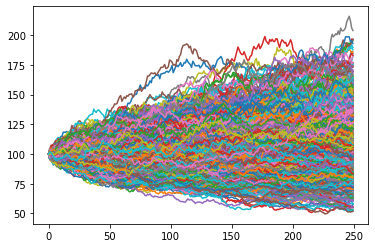

In [128]:
price_1y.plot(legend=False)

<AxesSubplot:>

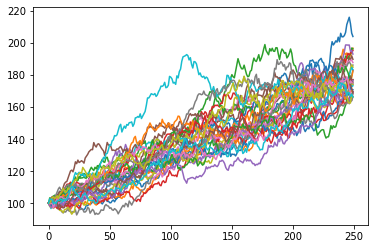

In [134]:
price_1y_30 = price_1y.T.sort_values(249, ascending = False).head(30)
price_1y_30.T.plot(legend=False)

(b) Calculate the average Sharpe ratio of 3000 stocks and Top 30 stocks. Calculate the Sharpe ratio by (annual return / annual volatility).

In [144]:
Sharpe_1y = price_1y.iloc[-1].mean() / price_1y.iloc[-1].std()
Sharpe_1y_30 = price_1y_30.iloc[-1].mean() / price_1y_30.iloc[-1].std()
print('Sharpe Ratio:', round(Sharpe_1y,2))
print('Sharpe Ratio_top30:', round(Sharpe_1y_30,2))

Sharpe Ratio: 5.0
Sharpe Ratio_top30: 6.12


(c) Is it okay to invest money on these 30 stocks? If not, why?

(d) Now, we have longer time horizon in years:5. Repeat (a) and (b).

In [130]:
n_years = 5
price_5y = gbm(n_years, n_stocks, mu, sigma, steps_per_year, s_0)
price_5y

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,98.360277,100.855872,100.108544,101.801939,100.585488,99.150678,102.218401,101.247172,101.727906,103.354715,...,98.834869,99.822900,99.155483,100.088845,100.432893,98.947581,99.443114,99.509814,100.480296,99.823036
2,98.391405,100.552482,100.997411,101.298344,100.639265,98.263012,102.369923,102.770627,102.590569,104.491604,...,97.861589,100.555109,99.881960,100.421835,100.429452,97.743073,102.432211,97.223866,100.009236,97.567924
3,96.538764,99.866505,100.750143,99.451442,103.181243,93.969646,102.795805,103.076706,102.778637,103.003945,...,97.624079,100.796854,99.693060,98.714171,101.208248,101.163219,101.314309,97.651668,97.483367,100.570575
4,97.008766,98.654792,98.528072,97.632661,104.051601,93.192630,102.666201,103.034916,102.109528,104.592557,...,98.521747,100.354027,101.193029,98.015952,101.033395,101.204988,101.420520,97.896229,98.351009,100.778973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,85.688971,110.228405,107.285054,233.381341,274.232304,38.277749,161.915087,64.639034,104.891797,82.373041,...,97.812315,122.841704,134.678038,68.463765,110.981867,103.051374,90.879543,151.962676,53.467337,429.007035
1246,84.876624,107.476055,106.435196,231.205768,277.723772,38.893421,160.822667,63.787710,104.910619,82.118661,...,96.129152,123.548693,135.767217,66.749133,112.966356,103.512187,91.014248,153.520164,53.598927,427.284172
1247,84.275222,106.387210,105.723453,231.611300,278.367152,39.276369,163.479718,64.975315,104.576830,80.775742,...,96.768639,124.621919,138.625735,65.989981,114.112881,103.217618,90.155770,150.193240,53.659014,425.952715
1248,84.345967,107.624874,108.041628,231.334810,287.207189,39.833970,162.846019,65.551334,106.311684,80.583372,...,96.896970,125.353772,143.697626,66.500034,112.584937,103.282403,90.957247,149.841935,53.870159,432.815464


<AxesSubplot:>

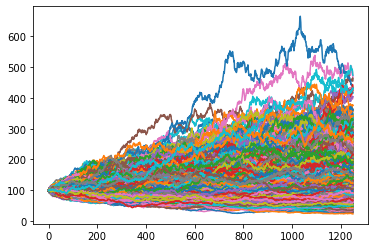

In [131]:
price_5y.plot(legend=False)

<AxesSubplot:>

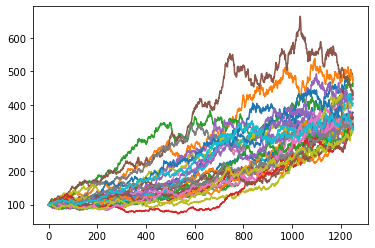

In [145]:
price_5y_30 = price_5y.T.sort_values(1249, ascending = False).head(30)
price_5y_30.T.plot(legend=False)

In [146]:
Sharpe_5y = price_5y.iloc[-1].mean() / price_5y.iloc[-1].std()
Sharpe_5y_30 = price_5y_30.iloc[-1].mean() / price_5y_30.iloc[-1].std()
print('Sharpe Ratio:', round(Sharpe_5y,2))
print('Sharpe Ratio_top30:', round(Sharpe_5y_30,2))

Sharpe Ratio: 2.19
Sharpe Ratio_top30: 2.63


(e) What intuition we can get from these results? Think about the relation with backtesting.